In [95]:
import pandas as pd
import spacy
import time
import nltk
from nltk import word_tokenize, pos_tag, pos_tag_sents

In [98]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tgdimas1\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [78]:
nlp = spacy.load('en_core_web_lg')

In [3]:
stopwords = spacy.lang.en.stop_words.STOP_WORDS

In [4]:
stopwords

{"'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five',
 'for',
 'former',
 'formerly',
 'forty',
 'four',
 'from',
 'fron

In [5]:
stopwords.remove('no')
stopwords.remove('against')
stopwords.remove('below')
stopwords.remove('cannot')
stopwords.remove('more')
stopwords.remove('much')
stopwords.remove('about')
stopwords.remove('above')
stopwords.remove('almost')
stopwords.remove('always')
stopwords.remove("n't")
stopwords.remove('never')
stopwords.remove('not')
stopwords.remove('n’t')
stopwords.remove('often')
stopwords.remove('because')
stopwords.remove('do')
stopwords.remove("will")


In [6]:
stopwords.add('i')
stopwords.add("i'm")
stopwords.add("it")
stopwords.add("my")
stopwords.add("we")
stopwords.add("he")
stopwords.add("she")
stopwords.add("this")
stopwords.add("it")
stopwords.add("that")
stopwords.add("\n")
stopwords.add("\n\n")

In [7]:
stopwords

{'\n',
 '\n\n',
 "'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'across',
 'after',
 'afterwards',
 'again',
 'all',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'could',
 'did',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five',
 'for',
 'former',
 'formerly',
 'forty',
 'four',
 'from',
 'front',
 'full',
 'further',
 'get',
 'give',
 'go',
 'had',
 'has',
 'have',
 'he

In [79]:
all_reviews = pd.read_csv('processed_data/restaurant_az_reviews.csv').drop(labels='Unnamed: 0', axis=1).head(100000)

In [100]:
all_restaurants = pd.read_csv('processed_data/restaurants_az.csv').drop(labels='Unnamed: 0', axis=1)

NameError: name 'df2' is not defined

In [81]:
all_reviews.shape

(100000, 13)

In [84]:
AZ

,Restaurants
review_stars,
1.0,11273
2.0,8752
3.0,11248
4.0,24281
5.0,44446


In [83]:
AZ = pd.DataFrame(all_reviews.groupby('review_stars').count()[['business_id']].rename(columns={'review_stars': 'Stars', 'business_id': 'Restaurants'})).head(100000)

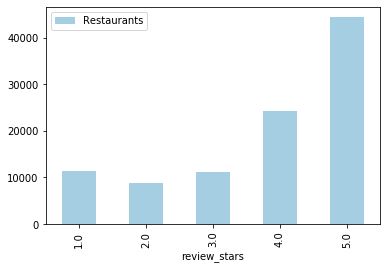

In [87]:
AZ.plot.bar(colormap='Paired')

In [89]:
reviews = pd.DataFrame(all_reviews['text'])

In [90]:
reviews['text'].apply(len).mean()

533.86589

In [91]:
reviews = all_reviews['text']

In [86]:
nlp = spacy.load('en_core_web_sm')

In [156]:
# tokenizer
start = time.time()
A = reviews.apply(nlp)
end   = time.time()
print(f'Duration:   {end-start:{5}}')
print(A)

Duration:   1880.2022833824158
0        (Enjoyed, Nee, House, immensely, ., No, servic...
1        (I, 'm, not, sure, how, I, rate, this, restaur...
2        (The, food, from, this, place, reminds, me, of...
3        (Found, this, place, by, just, driving, down, ...
4        (We, eat, here, on, a, regular, basis, .,  , I...
5        (The, best, Chinese, food, we, 've, had, in, a...
6        (This, 2, star, rating, is, for, the, service,...
7        (Service, was, shotty, ,, but, pretty, authent...
8        (My, previous, review, has, the, real, details...
9        (This, is, the, perfect, neighborhood, family,...
10       (After, reading, many, decent, reviews, and, s...
11       (Wow, I, was, very, impressed, when, I, first,...
12       (The, service, to, grab, a, seat, is, slow, li...
13       (Fresh, and, authentic, Chinese, food, ., We, ...
14       (This, is, a, nostalgia, play, -, if, you, wan...
15       (This, place, is, way, under, rated, !, !, !, ...
16       (Our, office, ju

In [160]:
print(1751.9552311897278*100000/60/100000/4)

7.2998134632905325


In [153]:
# tokenizer
start = time.time()
X = reviews.apply(word_tokenize)
end   = time.time()
print(f'Duration:   {end-start:{5}}')
print(X)

Duration:   71.00524020195007
0        [Enjoyed, Nee, House, immensely, ., No, servic...
1        [I, 'm, not, sure, how, I, rate, this, restaur...
2        [The, food, from, this, place, reminds, me, of...
3        [Found, this, place, by, just, driving, down, ...
4        [We, eat, here, on, a, regular, basis, ., It, ...
5        [The, best, Chinese, food, we, 've, had, in, a...
6        [This, 2, star, rating, is, for, the, service,...
7        [Service, was, shotty, ,, but, pretty, authent...
8        [My, previous, review, has, the, real, details...
9        [This, is, the, perfect, neighborhood, family,...
10       [After, reading, many, decent, reviews, and, s...
11       [Wow, I, was, very, impressed, when, I, first,...
12       [The, service, to, grab, a, seat, is, slow, li...
13       [Fresh, and, authentic, Chinese, food, ., We, ...
14       [This, is, a, nostalgia, play, -, if, you, wan...
15       [This, place, is, way, under, rated, !, !, !, ...
16       [Our, office, jus

In [161]:
print(71.00524020195007*2/60)

2.3668413400650024


In [101]:
# tagger
start = time.time()
X = pos_tag_sents( reviews.apply(word_tokenize).tolist(), lang='eng' )
end   = time.time()
print(f'Duration:   {end-start:{5}}')
print(X)

LookupError: 
**********************************************************************
  Resource [93maveraged_perceptron_tagger[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('averaged_perceptron_tagger')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtaggers/averaged_perceptron_tagger/averaged_perceptron_tagger.pickle[0m

  Searched in:
    - 'C:\\Users\\tgdimas1/nltk_data'
    - 'C:\\Users\\tgdimas1\\AppData\\Local\\Continuum\\anaconda3\\nltk_data'
    - 'C:\\Users\\tgdimas1\\AppData\\Local\\Continuum\\anaconda3\\share\\nltk_data'
    - 'C:\\Users\\tgdimas1\\AppData\\Local\\Continuum\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\tgdimas1\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [ ]:
# plot how many reviews we have of each star
x = AZ.review_stars.value_counts().index
y = Restaurant_reviews.review_stars.value_counts().values

plot.figure(figsize=(8,5))
# colors are in the order 5, 4, 3, 1, 2
bar_colors = ['darkgreen', 'mediumseagreen', 'gold', 'crimson', 'orange']
plot.bar(star_x, star_y, color=bar_colors, width=.6)
plot.xlabel('Stars (Rating)')
plot.ylabel('Number of Reviews')
plot.title(f'Number of Reviews Per Rating of {businesses_to_analyse}')

In [74]:
def clean_doc(doc):
    # Remove punctuation, symbols (#) and stopwords
    doc = [tok.text for tok in doc if (tok.text.lower() not in stopwords and tok.pos_ != "PUNCT" and tok.pos_ != "SYM")]
    # Make all tokens lowercase
    doc = [tok.lower() for tok in doc]
    doc = ' '.join(doc).replace("n't",'not')
    return nlp.make_doc(doc)

In [76]:
docs = []
for index, restaurant in all_restaurants.iterrows():
    print(f'Restaurant : {restaurant["name"]} \n')
    for parsed_review in nlp.pipe(iter(all_reviews.query(' business_id == "'+restaurant['business_id']+'" ')['text']), batch_size=1000, n_threads=8):
        docs.append(parsed_review)
        print('\n-------------')
        print(parsed_review)
        print('\n-----')          
        print(clean_doc(parsed_review))
    if(index>0):
        break

Restaurant : Nee House Chinese Restaurant 


-------------
Enjoyed Nee House immensely. No service issues, just fantastic chinese food. Food order? Spicy Green Beans = Perfect!, Chow Fun (Chicken) = Perfect! 

Just a great place. Perhaps my expectations were set by all the bad service reviews, but I was not disappointed.

-----
enjoyed nee house immensely no service issues fantastic chinese food food order spicy green beans = perfect chow fun chicken perfect great place expectations set bad service reviews not disappointed

-------------
I'm not sure how I rate this restaurant because I walked in to get some soup. It was around 4pm and I was in destroyed need of something that would clear my sinuses. Hot and sour soap always does the trick. I was told that I couldn't order a cup because it was supper time. That's okay, so I ordered a bowl of soup to take home... it was 11.00, and that okay too. My only thing is that it looked like a cup and the soup was not too fresh. It was good thoug

like place family eaten restaurant not remember almost always order takeout pan fried noodles fantastic especially noodles extra crispy pineaple chicken yummy black bean shrimp delicious fried rice amazing especially house fried rice pork comes 1 2 shrimp good dad travel china lot work says place authentic gets area

-------------
Very disappointed with the lack of flavor in the beef chow fun. It was cooked well, not soggy, but there was no flavor at all. Not interested in coming back if a simple dish like that done wrong.

-----
disappointed lack flavor beef chow fun cooked not soggy no flavor not interested coming simple dish like wrong

-------------
The wait staff is as nasty as the food. RUDE AND UNFRIENDLY SERVICE; they act like they are annoyed that you came in to dine in their restaurant. The meat and chicken (if you can call it that) is spongy and bland.  Since I have worked in food service, I am guessing they use "processed meat product".  Some restaurants use this because it

Finding authentic Chinese food in Scottsdale has been quite difficult.  Nee House is the solution to that problem.  Their menu on Yelp is not as extensive as when you get to the restaurant.  When I got to the restaurant and saw their menu, I was amazed by all the choices and could eat here all week and not cover everything I wanted to order.

-----
finding authentic chinese food scottsdale difficult   nee house solution problem   menu yelp not extensive restaurant   got restaurant saw menu amazed choices eat week not cover wanted order

-------------
I have been on a search for decent Chinese in NE Phoenix and I think I've found it!!! I ordered chicken friend rice and sweet and sour chicken, neither of which disappointed! I love how the sweet and sour chicken was prepared- cooked in the sauce instead of just battered/fried chicken with sauce on the side!!!! I will return to try other dishes!!!

-----
search decent chinese ne phoenix think found ordered chicken friend rice sweet sour ch

After this glowing review, why 4 stars instead of 5?  Because of the wait- the place can get pretty packed.  I always feel like I need to get there early to get a table without the wait- too bad the restaurant doesn't offer any "early bird" specials!

-----
love living phoenix   no doubt about   city restaurant bar heaven   like day new restaurant opening new twist new kind cuisine   do not wrong- love avid trier new places days earn simple straight forward chinese food remembered eating growing east coast good eats plenty chinatowns new york philadelphia places chandler mesa live north phoenix do not always want drive pretty excited discover nee house- love food there- simple always good   great selection seafood entrees puts son heaven  
 decor simple unpretentious- always feel relaxed know going fed mouth watering delicious dishes glowing review 4 stars instead 5   because wait- place pretty packed   always feel like need early table wait- bad restaurant not offer early bird special

thing believe things dinner menu probably more tasty items lunch special ordered 2 lunch specials(orange chicken eggplant salt & pepper deep fried shrimp lunch specials came soup got hot sour soup pretty good flavor perfect broth thick lunch entrees mediocre shrimp dish amazing loved jalapeños onions chives great touch sure dig inside heads lol think came try more dishes dinner menu like

-------------
Food is good, place is clean.   I always eat here because food is close to being authentic.   However, the female regular waitress can be very rude.  She has no manners.

-----
food good place clean    always eat because food close authentic    female regular waitress rude   no manners

-------------
This restaurant is definitely better than its 3.5 star rating!
The decor is a little run down, but the food here is authentic and very flavorful. 
Instead of driving a lot further south to mesa, this place offers some great food. 
I would consider it a little pricier than your typical Chines

 tip fingers crossed early 20 female waitress think age group working waitress   will sure royal treatment

-------------
I've tried several dishes here and they are all delicious. Their service can be a little shaky but otherwise I'm a fan.

-----
tried dishes delicious service little shaky fan

-------------
Frequent diner and take out customer at this restaurant for many years.  Only decent Chinese restaurant in the Northeast Phoenix Area. Come for the food only but beware the service is always horrible from the older Chinese waitress with the glasses. This woman does not know or care about the meaning of customer service and being friendly and attentive.  Always very argumentative when asking for something and condescending to us and in my observation with other customers with a sour face. I recently ordered takeout with value of over $120 and asked for extra gravy on a particular dish. This same waitress taking my phone order said it will cost me $2.00 more. They just received a n

My name is Stirling Peters.

-----
tried place couple years ago replaced restaurant not looked reviews gave place good doubt tried food awful reviewers mentioned americanized food not good authentic chinese food great ordered shrimp eggplant szechwan sauce assumed somewhat authentic no flavor point whatsoever eggplant mushy bland shrimp tasted like garlic remembered fried rice reminded took years drive china chili phoenix sichuan prawns notice spelled correctly enjoy food ask never restaurant stirling peters

-------------
I have to agree with many of the reviewers. The food is delicious, but the service STINKS!! The service is not friendly, you feel like you've been accosted when they take your order, and when the food comes out they practically drop it on the table and run for the hills. 

On a positive note, the food is very good, we've not yet been disappointed with any of our selections. My two boys are very picky eaters, but they devour the chicken w/veggies, veggie lo mein, and 

 do not let chance getting server not ms. charming scare away place abuse want long food coming

-------------
My family and I have been going to Nee House for years now and it is one if not the best place to get real authentic Chinese food in Phoenix. Some of our favorites are the Singapore noodles, beef chow fun, crispy pan fried chow mein,mandarin pork chops, wonton soup, and the salt fish and chicken fried rice. Prices are decent but I would say it is worth it. If your looking for some good Chinese food then you should check this place out!

-----
family going nee house years not best place real authentic chinese food phoenix favorites singapore noodles beef chow fun crispy pan fried chow mein mandarin pork chops wonton soup salt fish chicken fried rice prices decent worth looking good chinese food check place

-------------
Go here for the food and go with my sister-in-law!  Boy, does she order enough to satisfy everyone in our party, making other diners in the restaurant envious 

stars taste personal liked places rated low disliked rated highly walked table filled place clean tile floors clean not sticky slippery served immediately food tasty hot fresh szechuan beans right spice crunch fish baby bok choy right salt veggies perfectly al dente ginger onion   lobster fresh perfect spring bite peking ribs cooked plenty yummy sauce end mother told waitress tell cook food delicious place gets 5 stars because food service good prices decent place come recommend bring town friends

-------------
So we've had some very good food at Nee House but I just don't care. 

It's the fried rice..... I'm a fried rice junkie. Ever since I was a kid. I'm 1/2 Chinese and grew up in AZ. I remember fried rice at China Doll from my very early days.

Nee House's fried rice is probably the best fried rice I've ever had. 

My dad is from Canton, China, and he favors the salted fish and chicken fried rice. While I love that, I have to disagree and go with the crab and dried scallop fried r

He refused to serve us the for remainder of the meal and had the other lady working there give us our check. We certainly won't be returning, and I hope that anyone else who braves this establishment has a better experience than we did.

-----
far worst experience restaurant entire life wish exaggerating topped bad experience past entire experience bad beginning end came thanksgiving meal hour endured ruined entire holiday service terrible 1 3 tables served not busy treated like house line people waiting door began not greeted woman hurriedly walked looked came ask question said replied repeated fun began took about 10 minutes acknowledged waiter owner asked coke diet coke angrily took teacups away returned sodas about 10 minutes later not sure tick sure upset came inquired about price crab told ummmm ummmmmmmmm 45.00 bigger smaller quickly walked away said lady working walked finally came took order ordered chinese confirmed english food certainly not long arrive much paper wrapped ch

best chinese restuarant arizona visited chinese resturants compares food looking good chinese food az place

-------------
Tried their lunch menu that ranged between $8.50- $9.50.  Had the shredded pork with hot garlic sauce  after they couldn't deliver the walnut shrimp without sugar.  The mayonnaise sauce had sugar in it.  She said it wouldn't taste like much if I didn't have the mayonnaise sauce.  OK. Then shredded pork  it is.  
The lunch comes with soup (egg drop or hot and sour), a spring roll, white rice (or egg fried rice).  Had the egg drop soup which was delicious.  Probably the best I have had in the valley.  Some places put so much corn starch that it is more like a pudding--not here.  The salt level was perfect as well.  None of the noodles usually served with soups here.  Maybe they think it is not authentic. The spring roll was light, flavorful and not greasy.  I didn't care for the egg fried rice as it was too plain.  

The shredded pork with hot garlic sauce was a good


-----
nee house like standard okay takeout place portions large veggies plus pea shoots bok choy cooked pretty entree items tried standard american chinese food okay breading chicken excessive eat ordering not got way nee house

-------------
Terrible. Pot stickers were so overcooked, they crunched like raw pasta. Very obviously frozen previously. Gross. If you're ordering the pineapple chicken, be prepared to sift through lots of huge chunks of ginger. I enjoy very spicy foods, and understand ginger for flavor, but chunks that look just like the pineapple? So unbelievably bitter. Would not refund. I was really looking forward to this place, given the previous reviews. Don't waste your time or money.

-----
terrible pot stickers overcooked crunched like raw pasta obviously frozen previously gross ordering pineapple chicken prepared sift lots huge chunks ginger enjoy spicy foods understand ginger flavor chunks look like pineapple unbelievably bitter not refund looking forward place giv

war wonton soup good mixed seafood platter light dish white sauce seafood cooked not chewy overall happy dinner

-------------
One of the rudest restaurant I have had the misfortune of going to. Went there for dinner with friends and service was slow and the place was empty. Food had little taste and when we asked for low sodium they claimed they had know even though we saw it on the table next to ours. 
At end of dinner we asked for to go boxes and had to ask three tines to get them. If you love Chinese food for someplace other than NEE house.

-----
rudest restaurant misfortune going went dinner friends service slow place food little taste asked low sodium claimed know saw table end dinner asked boxes ask tines love chinese food someplace nee house

-------------
Terrible service. The wait staff has real attitude problem. Mongolian beef was chewy.  Moo shu pork plain additional charge for more wrappers!!! Overpriced...for what you get! Go somewhere else!

-----
terrible service wait 

 gentleman came ordered fried rice meal   ordered staff started streaming kitchen eat family style lunch large corner tables bringing plates rice   gentleman received food let guy know ordered fried rice given steamed   older woman taking care told fried rice   total crap right   ordered fine not   soon clear dishwasher came plate fried rice eat corner table staff   almost not believe   gentleman not catch not complain   felt bad   obviously do not care much about not offer cook   oh based food wo not coming   search good chinese food valley continues

-------------
Had a fairly decent meal on 5/14/16.  Portions were large and tasted okay.  We were finished with our meal and chatting with our friends when asked to leave. We were told that the table was needed.  There were a few people waiting who could have been seated at other available tables at this   early evening.  They were rude, inconsiderate, and just really used poor business sense!  We will think long and hard before we retur

* Fried Pork spareribs in salt-spicy.....a bit greasy, but pretty authentic.

-----
moving san francisco chinese food common seeing women scottsdale wear shorts uggs found place good gets chinese food valley read comments restaurant restaurant general people love rant about bad service horrible mentioned food specific temperature came unbelievable people tell hot cold food specific degree love mouths come thermometer   stuck nevermind nee house keeps content craving chinese food missing san francisco  

 trying american version chinese food  

 foodie things learn about chinese restaurants 1   not orange chicken pineapple chicken etc ai not gon na find shit asia try panda express want good orange chicken 2   chinese restaurants will not service will find 3 michelin rated restaurant dining tommy toy san francisco   attitude rudeness comes territory   soul food   attitude difference tough bitches   food tastes better attitude 3 reality check live phoenix   want chinese food nee house try

This place has the best Chinese food I've had in Phoenix ~ I've searched for 2 1/2 years and tonight was delighted - at last - dang I was happy (a LOT of bad Chinese food in the Valley - YUCK and that this isn't BAD - means it's good -sad right?) So the food was dynamite times ten.  The décor, those big A___ fish in the tank look healthy enough - fairly clean - in a strip mall - whatever - Domino's is nearly next door if you are in a carry out frenzy.  But at over 50 years young, and a trained Chef - I never expected to be treated like CRAP no not CARP - and well frankly I was. This was the FIRST time I have EVER stiffed (no tip) EVER!!!!!!  Felt bizarre - but in a way it was liberating - I have tipped 20% for the WORST service in the country  (it's just part of who I am working in hospitality since I was about 17 y.o)....I was treated very well early on - told my menu choice is enjoyed by many, told how to 'manage' it as I'd never ordered this beef tenderloin in a lettuce cup.  ALL wa

I see a lot of complaints about customer services, we've had no issues.  They are always friendly and polite but no, they don't go out of the way to charm the socks off of you, but I don't care, I don't need them to hold my hand during my dinner.  I just need the to keep my water filled, my food hot and fresh, my check ready when we are done and they NEVER fail to deliver here.

-----
absolutely love chinese restaurant   place authentic true authentic chinese restaurant north scottsdale  

 fresh tanks lobsters dungeness crabs tilapia fish   prepared handful ways  

 special occasions order lobsters house special sauce amazing   like finger licking good regular house special pan fried boodles thin pan fried boddles brown sauce topped shrimp beef chicken ginger carrots baby bok choy   skinny noodles good textural experience taste buds salt & pepper pork chops   lightly battered bone pork chops fried crispy tossed scallions salt jalapeños   order thing order orange beef orange chicken st

Go there, you won't be sorry.

-----
love place   food awesome people great not pricey   serve family style great place group sample little going opened   time basic plates cups not match   food always great thing mind dining   bring dish ready 5 minute delay time   dish served problem not sharing dishes wo not sorry

-------------
Can you have ZERO stars??? The food is actually good.  If you feel like being treated like shit, this is the place for you.  We have been long - time customers until tonight.  They have no respect for their customers.  If looks could kill when you walk thru the door.  Another review said it reminds them of Chinatown in NYC and Boston.  Having grown up in NYC and living in Boston as an adult, this is NOTHING like Chinatown.  In New York they are smart enough to realize that repeat business is where it is at. The cost of new customer acquisition is too high. After getting apps on our table, a suspect hair was noticed on a plate. Ok, let's cut to the chase...it

The first misstep was the egg rolls. They were the oddest egg rolls I have ever eaten. The pork tasted like some type of processed pork you'd get in a grocery store deli. The crab rangoon were overly fishy and soggy. The chicken and beef were velveted to the point that they both almost tasted mushy. The worst part is that this all added up to $56 and will be going in the trash.

-----
decided branch usual chinese mr. cook mistake ordered pork egg rolls crab rangoon chicken pan fried noodles salt & pepper squid beef oyster sauce good husband loved squid bad ended rice eat leftovers misstep egg rolls oddest egg rolls eaten pork tasted like type processed pork grocery store deli crab rangoon overly fishy soggy chicken beef velveted point almost tasted mushy worst added 56 will going trash

-------------
Love the food - great selection and the price is right.  One of the best Chinese restaurants around!

-----
love food great selection price right   best chinese restaurants

-------------


okay yelpers not overly impressed place ecstatic   major bonus because actually got authentic chinese restaurant north phoenix   tanks filled fresh crustaceans soon cooked devoured   caucasians not majority assess customer base decor called clean dive ish   love   table cloths dinner time unnecessary given rest decor   portions plentiful   food lots flavor   chicken black bean sauce fantastic spicy   prawns honey pecans okay bit rich   prawns covered unusually rich mayonnaise sauce not favorite credit serving unique   chow fun noodles not missed   new favorite chinese restaurant   north phoenix blessed nee house neighborhood
Restaurant : Vintage 95 


-------------
I was really disappointed with my most recent visit to Vintage 95. I make it out there every six months or so and always talk it up to friends. Tonight I went with my husband and in-laws. We ordered a carafe of sangria, which as always was top notch. My in-laws ordered bruschetta - they ended up with a ton of untoasted bread

... maybe the Queen Creek Olives, Italian Flatbread, Salmon, or vintage Burger.

-----
far food snob much more likely enjoy pb&j home eat expensive fancy 5-star restaurant ahead unrefined took girlfriend try new experience cool not particularly enthused food not bad not liking said gf liked ordered bruschetta totally different actually pick 4 flavors 6 flavors mix match like flavors not expecting got   pistachio date marscarpone house ricotta heirloom tomatoes basil vinaigrette tenderbelly bacon jam whipped goat cheese prosciutto house ricotta fig honey prosciutto far normal bunch opinion tenderbelly bacon jam interesting like smoky meat jelly concoction not sense tastebuds good pistachio felt like eating gooey trailmix blend piece bread not bad not style maybe likes finer things life enjoy more mileage vary think enjoyed bowl olives more ordered brazilian steak gf ordered watermelon salad brazilian steak different more like raw beef hamburger steak flavorful juicy messy good gf loved 

stopped check place loved   visited months ago new service food excellent   wonderful outdoor area lots comfortable furniture   more friends

-------------
I have been to Vintage 95 probably 8-10 times now & normally it could be a 4 star place.  It's typically great for what it is, a local restaurant in the AZ suburbs, that don't always offer non-chain restaurant options.  We went to restaurant week last night & didn't care for it.  The restaurant was almost empty, but the service was super slow.  We were asked to take our silverware off the plates being cleared to use them again; which is fine, but also a weird request of the customers in any typical medium-high-end restaurant.  We were sitting outside & a kitten/it's "patio cat" mom were climbing all over the tables.  I mentioned that sadly, I'm super allergic to cats so I didn't want my silverware on the table that we assume previously had cats walking on it.  We all balanced the used silverware on top of our water glasses.  Which t

My other work events at Chop, The Mission, The Living Room, Kona Grill, and Firebirds have all been much better experiences. Try one of those if you're planning to go with a large group.

-----
good drinks apps atmosphere not good corporate events large parties dinners enjoy vintage 95 regular basis happy hour drinks apps good deals wine flatbreads atmosphere patio lovely service pretty good depends server servers pros know stuff want experience positive not attentive friendly depends opinion ambiance cool firepit live music good specials worth planning head drinks work will enjoy planning event large group completely different story highly discourage considering worked vintage 95 managers plan event about 14 15 people weeks happy willingness work budget menu preferences etc got closer event responsiveness dropped friendly nudges eventually got menu date prices set showed large group event fell apart server not realize prix fixe menu not aware requests regards drinks/ bottles wine not 

I'll go back again because I love settings in which the conversation is the art form.  Maybe next time I'll be there in time for happy hour.

-----
love leather sofas comfy chairs fireplace brick walls general ambiance restaurant   warm conducive sitting conversation having glass wine   tomato bisque good rock shrimp good   sat bar bartender friendly knew wines negative pricing high dishes   

 because love settings conversation art form   maybe time time happy hour

-------------
Had lunch here today. Wanted to order Arancini. Apparently, I was looking at the happy hour menu but that's what I was given. 

Ordered 2 Bloody Mary's and asked if they really make them like the picture your Facebook page posted a few weeks back (showed him the pic) his response, "yea I guess we can do that. It's a brunch thing normally."  It was currently 1:45pm. Brunch is served until 3pm on Sunday. Drink was the worst Bloody Mary I have ever had. I couldn't even finish it. 

Asked for a house salad but wi

Okay so my fiance and I came here for our 6 year anniversary with a reservation. They sat us at the most awkward table in the whole place  which is this 2 person table located right by the front waiting area and way too close to another table where you have to worry about bumping into the person behind you so we asked to move. I ordered the Ahi Tuna and it tasted terrible to me..the tuna itself was good but everything else did not compliment it at all..I felt like it was just some random things added when you experiment with food but didn't come out as good as you thought it would. I just ate the tuna. I also had the banana tres leches and since I am Mexican I'm going to be terribly picky about this. They definitely had the right idea but the banana flavor tasted generic when it would've been better if it tasted more like real bananas. Other than the food this place had really good service and a nice atmosphere but if it wasn't for those two things Vintage 95 would have got 2 stars for

Throw this one in your back pocket for date night, guys!

-----
not wait come vintage 95 date night romantic atmosphere lots comfy furniture live music weekends sarah r. tried glass coto de hayas spain believe tempranillo cabernet memory little hazy stop night drinks totally order bottle wine selection pretty extensive lots 5 glass options know certain timeframe charcuterie board purchase bottle bar not wine lovers throw pocket date night guys

-------------
Amazing!! 
My family was in town while attending some spring training games. A friend of ours suggested Vinatge 95 and we are thrilled to say we fell in love with the place. Outstanding decor invites you to your dinning table or casual dinning at one of their couches or fire-pits. The three of us sat at a table next to the wine room and we started off with a flatbread which was a great way to start off our meal. They have an extensive wine list and we all had a glass of what our personal preferences was that night. Axel was our ser

 impressed time thought great tip do not buy groupon will completely ignored 1 ignored got happy hr chard waiting friend showed 5:07 4:50 ordered glass wine happy hour prices waiting got prob 10 mins later 2 friend shows 5:07 no waiter 5:20 ish waiter order course wine 3 waiter 1 asks about 2nd 3rd courses ordered 5:30   23 mins 4 5:40 friends glass wine shows 2nd waitress 1st course 3rd waiter 5 soup salad complete do want wine water nope no contact delivered waiter # 1 6 waitress # 2 shows plates no water no ask drinks 7 waiter 3 delivers pork belly no service no wine no water 8)   pork belly overdone somewhat ok johnny cakes never talked never asked questions about getting food etc 9 waiting waiting enter hostess clears table 10 605 main course shows delivered waiter 3 11 wine pairing 12 615 almost course wine shows 13 630 server no questions no water no wanted dessert 13b ask hostess check completely ignored 14 hostess takes phone groupon gracious do not job 15 hostess brings wrong

Cheers.

-----
great happy hour prices gf purchased bottle malbec bruschetta included pieces total came 28 bargain bruschetta not hard hate overly crispy enjoyed wine waiter super knowledgeable about wines friendly overall sat patio interior nicely decorated looked cozy complaints snooty hostess limited offering happy hour food choose bruschetta charcuterie place ideal small group date night cheers

-------------
Very good chow and great service. It appeared to be patronized by housewives during my one, lunch time visit. Not that tree is anything wrong with that.
Came back during the evening for a glass of wine. Still a nice place with mixed crowd. I wasn't sure about the two unsupervised kids taking up the couch, playing Angry Birds on mom's and dad's iPhones. Somewhat inappropriate, in my opinion.

-----
good chow great service appeared patronized housewives lunch time visit not tree wrong came evening glass wine nice place mixed crowd not sure about unsupervised kids taking couch pl

I'm going to have to try some other dishes to figure out if the burger and charcuterie board (and wine and atmosphere) are the only thing worth coming for.  I had a hard time bringing it down to 3 stars only because I really want to like this local place.

-----
like place 5th time come   wrote update time actually tried not vintage burger charcuterie board wanted share opinions warm brie ok portion cheese hummus meager think grilled vegetables more grilled grilled looking grill marks looked bare tasted bare house soup meh not fan   pretty plain served little croutons not memorable order fall salad surprised sweet salad   spring mix 3 4 little pieces butternut squash needs more maple vinaigrette completely sweet duh maple based poured maple syrup salad mixed like bowl   not pleasant because sweet   not order companions loved vintage burger agreed soup plain not worth ordering server gal nice quick atmosphere great issue sitting patio means sit small patio tables do not allow seat comfo

I love everything about this place, the atmosphere the vibe, and the food. We have had drinks here several times before but never eaten. We recently purchased a Groupon deal and really enjoyed our experience. The place was very crowed for a wednesday night and we were glad we had reservations. Service was very good, despite the fact that our server was very busy. Our food was really good, though I must spotlight the salmon dish. It truly was one of the best things I have ever eaten. Marinaded in lemongrass with coconut rice. Everything was paired perfectly!

-----
love about place atmosphere vibe food drinks times never eaten recently purchased groupon deal enjoyed experience place crowed wednesday night glad reservations service good despite fact server busy food good spotlight salmon dish truly best things eaten marinaded lemongrass coconut rice paired perfectly

-------------
I think this is the best wine bar in the east valley.  They have a cool patio and inside a few comfy couches

green chili pulled pork sandwich great smoked tomato bisque amazing siracha closed gangplankers waiting open space vintage 95 decor nice wine bar ish thick wood tables chairs textiles dimly lit old historical looking pendants hanging above bar place feels comfy outdoor patio exists w/ fire pit umbrellas day time working patio ways opening construction staff friendly smiles service attentive accurate manager owner came food about mid lunch food lunch 3 got pulled pork green chili mentioned beginning cup smoked tomato bisque w/ tasted like breaded grilled cheese eat stuff day day   pulled pork sandwich tasted good bread got little heavy half way ate meat chilis finish friend vegetarian got veggie panini commented good loved tomato soup friend vintage flatbread not enjoy overwhelmed pickled onions candied dates sweet eat drink went lunch not comment dessert not order looked offerings kind wondering no chocolate seeing wine bar nutella sauce kind not expected anyways heads try things happy

Our server was attentive without being in the way and allowed us to relax and enjoy our evening, never making us feel rushed or neglected.

-----
went celebrate valentine day great choice seated outside comfy chairs fire pit ambiance  

 wine bruschetta followed phenomenal dinner   ordered sea bass burger took turns eating wife not like fish enjoyed sea bass delicious burger amazing   grilled shortrib angus chuck patty tenderbelly bacon lettuce tomato crispy onion straws cheddar cheese   yum server attentive way allowed relax enjoy evening never making feel rushed neglected

-------------
Great spot that I highly recommend. Good wine selection and food, excellent ambiance that is perfect for a date night and plenty of options around to check out.

-----
great spot highly recommend good wine selection food excellent ambiance perfect date night plenty options check

-------------
Brie was boring. Everything white/yellow and mushy. Grain salad was good but needs better presentation. I was

We will DEFINTELY be back and I strongly recommend you put it on your list too.

-----
continuing quest identify cool locally owned places eat and/or drink caroline auditioned vintage 95 night understand eats drinks     mind platonic ideal bar pub eatery want frequent constant quest find   ideal expressed real life vintage 95 not damn close stars know pegged platonic ideal plan night drinks no plans food adult beverages warm conversation turned more location downtown chandler terrific owners created fine visual experience leather stone dark woods good lighting do not music turned loud cannot conversation pet peeves want stare people mouths enduring aural assault stand deck aircraft carrier friends want enjoy company conversation concept difficult grasp atmosphere vintage 95 close ideal sit leather couches fireplace time sit leather stools bar about fourteen more times sit patio seriously check patio exactly patio hangout bar exactly caroline told hostesses drinks seated bar area fabulo

reservations yelp anniversary notating special occasion disappointed restaurant not acknowledge special night food ok artisan board small price bruschetta tasty not nearly good living room   postinos service good

-------------
This is my new FAVORITE Place to go in downtown Chandler!!!! The atmosphere is wonderful (I can't wait for patio weather to sit out on their gorgeous patio!) I love the exposed brick and older building feel...makes me feel like I'm back home (Pennsylvania) when I'm inside the place. The food is INCREDIBLE!! Honestly, the brushetta is some of the best I've had. I compare all wine bar brushettas to Postino's which is one of my favorite, and I gotta say this is right up there. The one with the salami and ricotta is probably my favorite, it's to die for!! The pistachio/date or fig/with a maple flavor is also a fav. Honestly they are ALL good...the artichoke one is another fav...I could go on and on ;-) I had one of the dinner specials a few weeks ago, a monk fish ov

vintage 95 sexy young thing stop lunch always thrilled lunch selection perfect need always work always right time right perfect lunch perfect lunch choice salad cup tomato soup cheesy croutons bliss culinary genius dreamt love thank vintage lunch spot lovely

-------------
Nice place in downtown chandler.  I walked here from the hotel i was staying at.  The hotel recommended it and the reviews/photos looked good.  I had a good porter beer, terrific burger with grilled veggies instead of fries, and how could i pass on the smores cake?

I am giving this place  5 stars for the setting, good beer and service, but above all for the delicious burger.  The smores dessert was good, but nothing special.  It was like a dense brownie with a crust and marshmallow fluff topping.  It was good, but a bit too rich.  The burger was juicy and flavorful and came on a perfect bun.

-----
nice place downtown chandler   walked hotel staying   hotel recommended reviews photos looked good   good porter beer t

-------------
I loved this place! The bruschetta was delicious and the wine menu was extensive. The patio ambiance was very laid back with romantic lighting. They had someone playing acoustic guitar inside. Overall I really enjoyed this place and am very happy that it is close by.

-----
loved place bruschetta delicious wine menu extensive patio ambiance laid romantic lighting playing acoustic guitar inside overall enjoyed place happy close

-------------
My wife and I went there for dinner last night. We will be going back. It had a great atmosphere, low lights, good live music. 
The service was great, our server Stuart was great, not lingering but attentive which is the perfect balance. Stuart's wine recommendation was on point. I had the lamb and my wife had the sirloin. Both were fantastic. We started with the calamari which the Stuart recommended we have sautéed, again this was fantastic. And for afters we had the coconut tres-leche. 
They have a tapas happy hr 3-6 so we will be g

30 minutes passed, I just requested it to be To Go. My hunger passed already and my boyfriend was done with his food. hooray for our valentine's dinner night. Smh. Then when I requested the check, the Lamb Shank that I originally ordered was included in the receipt. So once again I had to call the attention of the server and ask to readjust the bill. Maybe it was Michael's (the server) off night. I too am a server and I get these moments. It's just really disappointing how on our valentine's dinner, I didn't have proper dinner. Oh well. On to the next hunt for a better upscale restaurant.

-----
went today boyfriend pre valentine dinner picked restaurant because high ratings promising photos do not know night server michael special night night seriously want forget reservation 4:45 requested intimate table 2 arrived 4:10 cheerful hostess seated near fireplace wall couple ladies talking about sons much request server quickly arrived placed couple waters table handed menus ordered lamb s

rating based 2 visits visit weeks ago awesome great waiter friendly & clearly communicated 1/2 price wine bottles sunday = awesome tonight not company friend met happy hour arriving 4 guess looked menu more closely long day challenged waiter suggestion trusted waiter steer good wine good price hh not good decision based totally previous visit mentioned 2 sauvignon blancs france not recommend took recommendation learned hh wine found later hh sb chile not mention bill came shock almost 100 tip learned not happy hour deals check showed 10 15 glass felt expensive chardonnay sauvignon blanc plus 1 appetizer combo meat cheese board not hh joked met flemings eat & drink better price wanted support downtown chandler business friend returned keys dessert asked hostess check happy hour menu guess never wiser happy hour sure waiter not lure spend more smart business sell not want return customers

-------------
I really wanted  to like this place.  I am hoping we just had back luck given many po

Sorry for the novel, but this place deserves it.  It's a tad pricey, but you easily could go to a chain and pay comparable prices for a meal for two that wouldn't be as good.  We will be coming back.  The menu isn't huge, so I wouldn't want to come so often that I get tired of it.  But I do want to come back and have another dining experience like we had today.

-----
omg eating   seriously  

 burger do home   uncomfortable hard benches tables not seat relative table ordinary food usual fountain drinks servers uniforms plastic tags etc not decor cozy homey   almost house   wood tables chairs comfortable simple elegant exciting food   said eating not do starter section   starter bruschetta order   theirs not little 2 bread circles   appear taken italian loaf sliced thick about inch   pieces choose unusual unique   meal   not cheese guy   like mozzarella ricotta paremsan i.e. italian cheeses usually italian food   things goat cheese feta cream cheese etc   not expect like treat lady lov

Visit! You won't be disappointed.

-----
yes   place going hit radars local mag asap   watch  

 hh consist good selection 5 wines varietals 20 bottles   choose pay price bottle will free meat board   great appetizer soups salads great little unique flairs   3 cup soup 9 12 salads ate pork belly appetizer o corn grit collards pork belly inch thick fatty soo delicious main courses unique tell chef takes pride work  

 owners actively evening chat customers   evenings soloist singer guitarist play compliments atmosphere nicely pricey night not hold stops vintage much money wish visit wo not disappointed

-------------
Stopping in for happy hour drinks and apps.  Great patio, service as so-so.  Would return for happy hour, but menu was not appealing enough to come back for dinner.

-----
stopping happy hour drinks apps   great patio service   return happy hour menu not appealing come dinner

-------------
We were here the first week of October for a private party on the patio.  It was a r

  cocktails decent fairly typical ordered bruschetta best thing ate not much ordered flatbread italian fiancé vintage felt entirely sweet sauce italian flatbread tasted like chef boyardee night went young girl live music more irritating voice more shrill frankly do not need hear multiple sara barielles covers trying enjoy sub - par meal accompany undesired entertainment little girl apparently come ballet recital began dancing middle restaurant server honestly little below standard probably best dining experience not offended end   night more relieved vintage 95 will not coming enjoy priced sub - par food 50-something pda 6 year olds tutus dancing abrasive live music vintage

-------------
A place for the senses!!

As soon as you walk in, you're greeted with warmth from the hostess staff,(first impressions start at the front, and are very crucial). we decided to belly up to the bar, and were instantly guided with knowledge and grace from the bartender( I forgot his name). With a chef an

Our server, Austin, was a fabulous representative of the restaurant and was super attentive and helpful.  He suggested the strawberry cake for dessert and WOW that too, was amazing.  We're foodies and love to eat out and are always hopeful that we'll get great service and great food...but that rarely happens.  Vintage 95 offers excellent service and excellent food in a really cool, relaxing, comfortable environment.  Vintage 95 just vaulted to the very top of our list of favorite restaurants.

-----
absolutely good gets   went lunch specifically try vintage burger because hard time finding fabulous burger east valley found vintage 95   good burger thousand lifetime   wife pork belly tacos fell love fusion flavors plate agreed entrees good hard not revisit vintage 95 probably tomorrow server austin fabulous representative restaurant super attentive helpful   suggested strawberry cake dessert wow amazing   foodies love eat always hopeful great service great food rarely happens   vintage 

Thanks Vintage 95....we've been waiting for you for a long time.

-----
wife walked vintage 95 weeks ago   looking lunch spot new years eve dinner   wow said   looking place like east valley forever   cozy comfort great fireplace inside killer patio outback  
 lunch comfy couch fireplace   great wine list   thought menu delivers service fits food atmosphere  

 went party 6 new years eve dinner   experience great price fixed menu amazingly low quality   staff little busy place packed delivered goods  

 thanks vintage 95 we've waiting long time

-------------
This place has a great staff and consistently good food. We really enjoy dining on the patio out back.

-----
place great staff consistently good food enjoy dining patio

-------------
Excellent wine selection, atmosphere, and the cheese board/salad I had were both lovely.

-----
excellent wine selection atmosphere cheese board salad lovely

-------------
First visit last week. Enjoyed a warm evening on the back patio which had so

ps. check out the door to their wine cellar, i want that in my house. it's gorgeous.

-----
wow place gem   highly recommend looking great place date chill friends patio wine visited friends phoenix area thanksgiving vacation took saturday night   do nt know much about chandler area place easily rival popular wine lounges san diego  

 food group ordered bunch bruschettas flatbreads couple sandwiches share family style   enjoyed especially recommend fig chutney absolutely amazing   sandwiches shrimp blt definitely stuck favorite   overall good service great wine great selection staff helpful helping pick perfect bottle based like fact think found new favorite wine thanks   wino like love place  

 ambiance nailed   awesome patio great decor   attention detail definitely noticeable chill spot ps check door wine cellar want house gorgeous

-------------
I would like to personally thank Grant and Wheeler for a night but I will never forget.

The service the food and the drinks are certain

went large group pretty impressed service getting orders quickly group 10 sat patio large large fire pits nice winter months nice night great place sit liked v95 board meats warm delicious pretzel bread accompaniment yes versus artisan board cheeses good meats sliced thin almost sour tasting truffle cheese delicious almost better different boards different sausages cheeses dinner opted restaurant week menu try smoked pork belly crispy jalapeño grit cake maple glaze topped tabasco coleslaw wow delicious not crazy about maple flavor combinations right salty sweet spicy grit cake tabasco coleslaw pork belly crispy soft complimented corn cake perfectly second braised beef shortrib charred tomatillo mash potatoes mole sauce tortilla hay sesame seeds shortrib little dry sauce flavor tomatillo mashed potatoes outstanding different perfectly paired mole shortrib sauce perfect crunch tortilla hay not much dessert person definitely wish ordered s'more looked like graham cracker crust brownie mar

I look forward to going back here when I am in the area.

-----
fiancé dined night great time  

 service fantastic   especially want thank host called confirmed reservation telling time dining reserved table fire   great historic location enjoyed learning about history server always search perfect manhattan started mainstay manhattan   great blend enjoyed fact served   started artisan board little smaller expecting enjoyed let pick meat cheese wide selection   shared blt light raspberry vinaigrette   shared short rib braised mole sauce fantastic sauce great flavors meat tender   server split entrees asking appreciated   states extensive wine list tried bottle came recommended not disappoint random ridge  

 look forward going area

-------------
This was a great experience for my wife and I last night! We had a groupon discount for a 3 course meal and it proved to be an excellent purchase.  Our waiter Axel was superb! He literally came to our table more than seven times to make sure w

In [103]:
docs = []
start = time.time()
startbatch = time.time()
print(f'Started at: {start:{20}}')
total = len(all_reviews)
#review['Parsed'] = all_reviews['text'].apply(nlp)
for parsed_doc in nlp.pipe(iter(all_reviews['text']), batch_size=1000, n_threads=4):
    docs.append(parsed_doc)
    if len(docs) % 1000 == 0:
        print(f'{len(docs)}/{total} processed in {time.time() - startbatch:>{5}} seconds')
        startbatch = time.time()
end   = time.time()
print(f'End at:     {end:{20}}')
print(f'Duration:   {end-start}')

Started at:   1573599252.3300846
1000/1075198 processed in 13.782190322875977 seconds


KeyboardInterrupt: 

In [ ]:
start = time.time()
sample = all_reviews.head(10000)['text']
review['Parsed'] = sample.apply(nlp)
end   = time.time()
print(f'Duration:   {end-start:{5}}')

In [ ]:
text = "God is Great! I won a lottery."
print(word_tokenize(text))